Задача:
    
    - построить модель регрессии, дерево решений, 
    - оптимизировать параметры и сравнить результаты.

Поскольку мы используем boston, то у него логичнее применять именно линейную регрессию.

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.linear_model import LinearRegression 
import numpy as np
boston = load_boston()


In [208]:
X_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
y_boston = pd.DataFrame(boston.target, columns=['MEDV'])
boston_df = pd.concat([X_boston,y_boston], axis=1)

In [209]:
X = boston_df[['LSTAT','RM', 'PTRATIO']]
Y = boston_df['MEDV']

In [210]:
Y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [212]:
def get_score(X,y, random_seed=42, model=None):
  if model is None:
    model = LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

Сразу применяем Dummies для данных в Х

In [213]:
def get_one_hot(X, cols):
    for each in cols:
        dummies = pd.get_dummies(X[each], prefix=each, drop_first=False)
        X = pd.concat([X, dummies], axis=1)
    return X

In [214]:
X_full = boston_df.drop(['MEDV'], axis=1)

In [215]:
X_hot = get_one_hot(X_full, X_full)
X_hot.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT_30.62,LSTAT_30.63,LSTAT_30.81,LSTAT_31.99,LSTAT_34.02,LSTAT_34.37,LSTAT_34.41,LSTAT_34.77,LSTAT_36.98,LSTAT_37.97
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,0,0,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,0,0,0,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,0,0,0,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,0,0,0,0,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
get_score(X_hot,Y)

0.791332762428727

Модель получилась очень неплохого качества

А теперь попробуем с Decision Tree

In [217]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [206]:
clf = DecisionTreeClassifier(max_depth=10)

Поскольку у нам нужна классификационная модель, а изначально в столбце MEDV идут разные значения, то я решил перевести данные в классы на основе перцентилей

In [218]:
Y_n = np.where((Y > 0 )&(Y <= 17.02), 1, Y)
Y_n = np.where((Y > 17.02 )&(Y <=21.02), 2, Y)
Y_n = np.where((Y > 17.02 )&(Y <= 21.2), 3, Y)
Y_n = np.where((Y > 21.2 )&(Y <= 25), 4, Y)
Y_n = np.where((Y > 25 )&(Y <= 50), 5, Y)

In [220]:
le.fit(Y_n)
Y_n = pd.Series(data = le.transform(Y_n))# делаем label encoding, ибо это у нас уже классификация.
Y_n.head()

0    137
1    113
2      0
3      0
4      0
dtype: int64

И вот тут какая-то очень странная история. Я понимаю, то я ошибся и Label Encoding здесь, по-хорошему, применяться не должен, но что тогда? Как разбить данные в Y на изначальные классы? Или оставить вообще только два класса?

In [221]:
clf.fit(X_hot, Y_n)

DecisionTreeClassifier(max_depth=10)

In [222]:
clf.predict(X_hot)

array([137, 104,   0,   0,   0,   0,   0,   0, 128,   0,   0,   0,   0,
       146,  80, 146, 128,  32,  80,  80,  32,  94,  32,  32,  32,  32,
        32,  32,  94, 108,  32,  94,  32,  32,  32, 110,  98,  91, 110,
         0,   0,   0,   0, 110, 110,  91,  98, 110,  92,  92, 110, 126,
       146, 110, 104,   0, 104,   0, 119, 110,  69, 110, 119, 146,   0,
       104,  92, 117,  92, 107, 145, 110, 145, 110, 138, 110, 110, 110,
       110, 110,   0,   0, 145, 126, 110,   0, 110, 110, 133,   0, 110,
       126, 126, 146, 104,   0, 110,   0,   0,   0,   0,   0, 110, 110,
       110,  93,  93, 110, 110, 110, 110, 125, 110, 110, 110, 110, 110,
       110, 110,  37, 110, 110, 110,  37, 110, 110,  58,  61, 110,  57,
       110,  94,  80,  58,  57,  57, 110, 110,  37,  57, 110,  57,  38,
        57,  57,  57,  57,  57,  57,  57,  94,  94,  80,  57,  57,  57,
        57,   0, 140, 146,   0,   0,   0,   0,  80, 146,   0,  80,  80,
        80,  57,  80, 128, 110,  37,   0, 110, 143,   0,   0,   

Какое-то очень низкое качество модели. Что я сделал не так?

А еще возникли проблемы с визуализацией дерева. Все что я смог - это сделать текстовый вариант визуализации

In [224]:
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_5 <= 6.55
|   |--- feature_563 <= 0.50
|   |   |--- feature_7 <= 1.34
|   |   |   |--- feature_12 <= 17.74
|   |   |   |   |--- class: 0
|   |   |   |--- feature_12 >  17.74
|   |   |   |   |--- feature_7 <= 1.18
|   |   |   |   |   |--- class: 41
|   |   |   |   |--- feature_7 >  1.18
|   |   |   |   |   |--- feature_1982 <= 0.50
|   |   |   |   |   |   |--- class: 26
|   |   |   |   |   |--- feature_1982 >  0.50
|   |   |   |   |   |   |--- class: 38
|   |   |--- feature_7 >  1.34
|   |   |   |--- feature_12 <= 7.19
|   |   |   |   |--- feature_1918 <= 0.50
|   |   |   |   |   |--- feature_1960 <= 0.50
|   |   |   |   |   |   |--- feature_7 <= 4.20
|   |   |   |   |   |   |   |--- feature_0 <= 0.07
|   |   |   |   |   |   |   |   |--- feature_613 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 143
|   |   |   |   |   |   |   |   |--- feature_613 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 146
|   |   |   |   |   |   |   |--- feature_0 >  0.07
|   |   

In [225]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

KeyError: 5

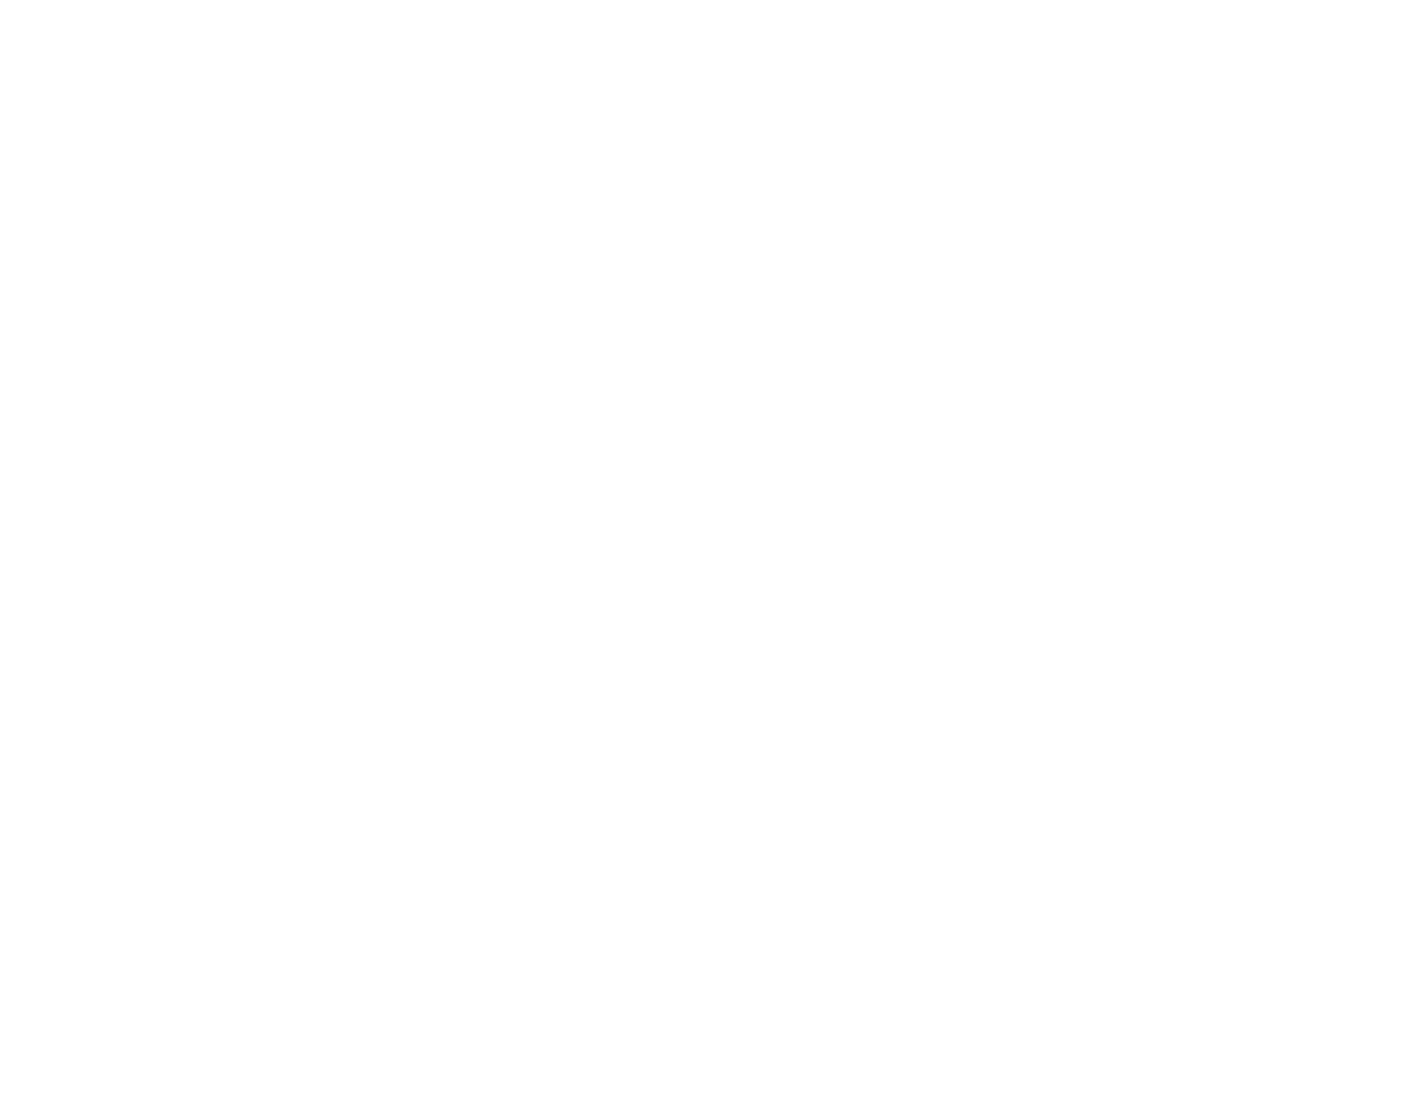

In [226]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X_hot,  
                   class_names=Y,
                   filled=True)